In [40]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [41]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [42]:
checker = pd.read_sql("SELECT * FROM checker WHERE uid LIKE 'user%' ",con,parse_dates='timestamp')
checker

,index,status,success,timestamp,numTrials,labname,uid
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4
...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1


In [43]:

checker['hour'] = checker['timestamp'].dt.hour
checker['day_of_week'] = checker['timestamp'].dt.day_of_week
days = {
    0: "Mon",
    1: "Tue",
    2: "Wed",
    3: "Thu",
    4: "Fri",
    5: "Sat",
    6: "Sun"
}
checker['day'] =checker['day_of_week'].replace(days)

checker

,index,status,success,timestamp,numTrials,labname,uid,hour,day_of_week,day
0,7,ready,0,2020-04-17 05:19:02.744528,1,project1,user_4,5,4,Fri
1,8,checking,0,2020-04-17 05:22:35.249331,2,project1,user_4,5,4,Fri
2,9,ready,1,2020-04-17 05:22:45.549397,2,project1,user_4,5,4,Fri
3,10,checking,1,2020-04-17 05:34:14.691200,3,project1,user_4,5,4,Fri
4,11,ready,1,2020-04-17 05:34:24.422370,3,project1,user_4,5,4,Fri
...,...,...,...,...,...,...,...,...,...,...
3202,3397,ready,0,2020-05-21 20:19:06.872761,7,laba06s,user_1,20,3,Thu
3203,3398,checking,0,2020-05-21 20:22:41.785725,8,laba06s,user_1,20,3,Thu
3204,3399,ready,0,2020-05-21 20:22:41.877806,8,laba06s,user_1,20,3,Thu
3205,3400,checking,0,2020-05-21 20:37:00.129678,9,laba06s,user_1,20,3,Thu


In [44]:
day_df = checker.groupby(['uid','day']).count()
day_df = day_df.reset_index()
new_day_df = day_df[['uid','day','day_of_week']]
new_day_df = new_day_df.rename(columns={'day_of_week':'count'})
new_day_df


,uid,day,count
0,user_0,Mon,3
1,user_1,Sat,1
2,user_1,Sun,43
3,user_1,Thu,39
4,user_1,Wed,1
...,...,...,...
133,user_7,Tue,5
134,user_7,Wed,3
135,user_8,Sat,46
136,user_8,Sun,26


In [45]:
hour_df = checker.groupby(['uid','hour']).count()
hour_df = hour_df.reset_index()
new_hour_df = hour_df[['uid','hour','day']]
new_hour_df = new_hour_df.rename(columns={'day':'count'})
new_hour_df


,uid,hour,count
0,user_0,17,3
1,user_1,12,1
2,user_1,16,1
3,user_1,17,8
4,user_1,19,21
...,...,...,...
303,user_8,16,14
304,user_8,17,7
305,user_8,19,7
306,user_8,20,1


In [46]:
heat_day = new_day_df.pivot(index='day',columns='uid',values='count')
heat_day.fillna(0, inplace=True)
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
commit = heat_day.sum(axis=0).sort_values(ascending=False).index
heat_day = heat_day[commit]
heat_day = heat_day.reindex(days_of_week)
heat_day

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
day,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,2.0,0.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,0.0,1.0,8.0,0.0,0.0


In [47]:
heat_hour = new_hour_df.pivot(index='hour',columns='uid',values='count')
heat_hour.fillna(0, inplace=True)
commit = heat_hour.sum(axis=0).sort_values(ascending=False).index
heat_hour = heat_hour[commit]

heat_hour

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.0,4.0,13.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0
10,26.0,2.0,42.0,18.0,20.0,16.0,0.0,0.0,0.0,2.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


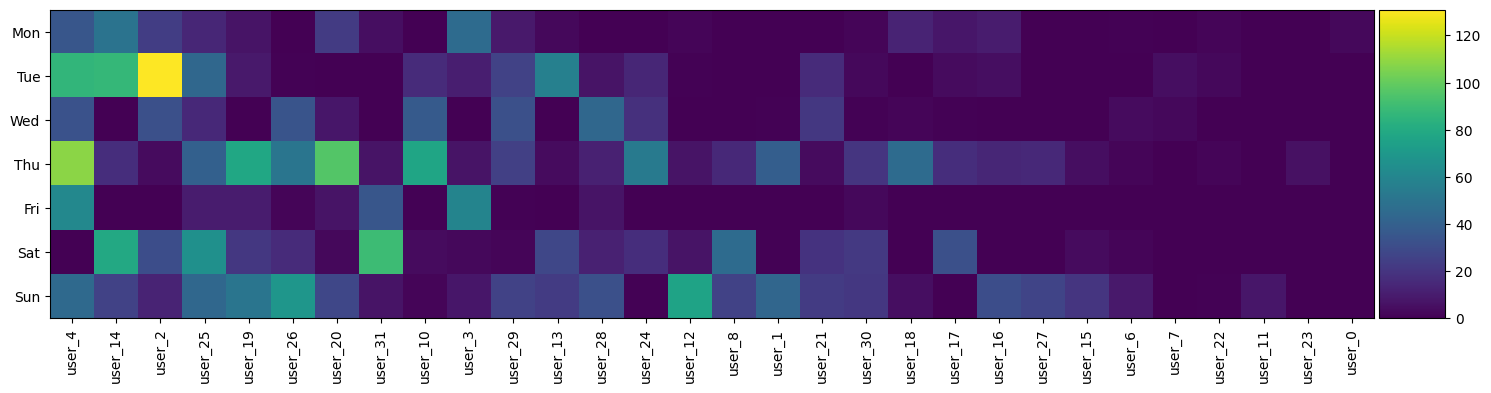

In [48]:
fig1,ax1 = plt.subplots(figsize=(18,6))
cax1 = ax1.imshow(heat_day,cmap='viridis')
divider = make_axes_locatable(ax1)
cax_colorbar = divider.append_axes("right", size="5%", pad=0.05)
ax1.set_xticks(range(heat_day.shape[1]))
ax1.set_yticks(range(heat_day.shape[0]))
ax1.set_xticklabels(heat_day.columns, rotation=90)
ax1.set_yticklabels(heat_day.index)
plt.colorbar(cax1, cax=cax_colorbar)
plt.show()

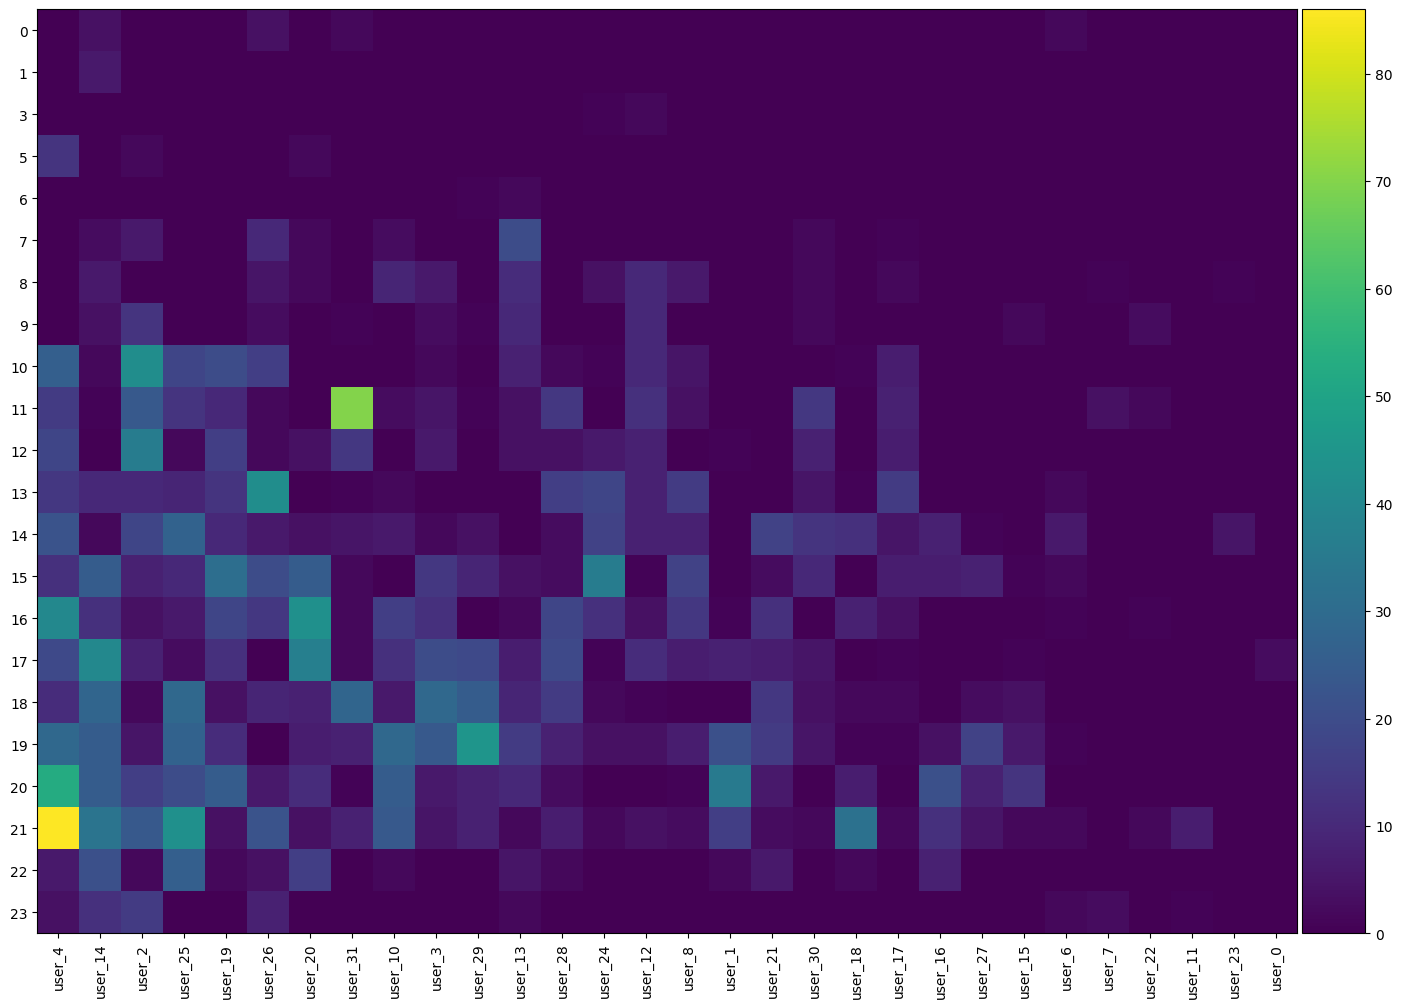

In [49]:
fig2, ax2 = plt.subplots(figsize=(22, 12))
cax2 = ax2.imshow(heat_hour, cmap='viridis')
divider2 = make_axes_locatable(ax2)
cax_colorbar2 = divider2.append_axes("right", size="5%", pad=0.05)
ax2.set_xticks(range(heat_hour.shape[1]))
ax2.set_yticks(range(heat_hour.shape[0]))
ax2.set_xticklabels(heat_hour.columns, rotation=90)
ax2.set_yticklabels(heat_hour.index)
plt.colorbar(cax2, cax=cax_colorbar2)
plt.show()

Which user has the most commits on Tue?

user_2

Which user has the most commits on Thu?

user_4

On which weekday do the users not like making a lot of commits?

Fri

Which user at which hour made the largest number of commits?

user_4 - 21

In [50]:
con.close()